✅ Librerías cargadas correctamente

1. INTRODUCCIÓN A GAUSSIAN RANDOM FIELDS

📚 DEFINICIÓN:
Un Gaussian Random Field (GRF) es una generalización de un proceso estocástico 
donde cada punto en un espacio d-dimensional sigue una distribución normal 
multivariante.

Características principales:
• Media: μ(x) - Función de media espacial
• Covarianza: k(x, x') - Función de kernel/covarianza
• Estacionariedad: Si k(x, x') = k(||x - x'||)

Kernels comunes:
1. RBF (Gaussian): k(r) = σ² exp(-r²/(2l²))
2. Matern: k(r) = σ² (2¹⁻ν/Γ(ν)) (√(2ν)r/l)ᵛ Kᵥ(√(2ν)r/l)
3. Exponencial: k(r) = σ² exp(-r/l)

Donde:
• r = ||x - x'|| (distancia euclidiana)
• l = length-scale (escala de longitud)
• σ² = variance (varianza)
• ν = parámetro de suavidad (Matern)

✅ Kernels de covarianza implementados
✅ Funciones de generación de GRF implementadas

4. EJEMPLO 1: GRF 1D - COMPARACIÓN DE KERNELS


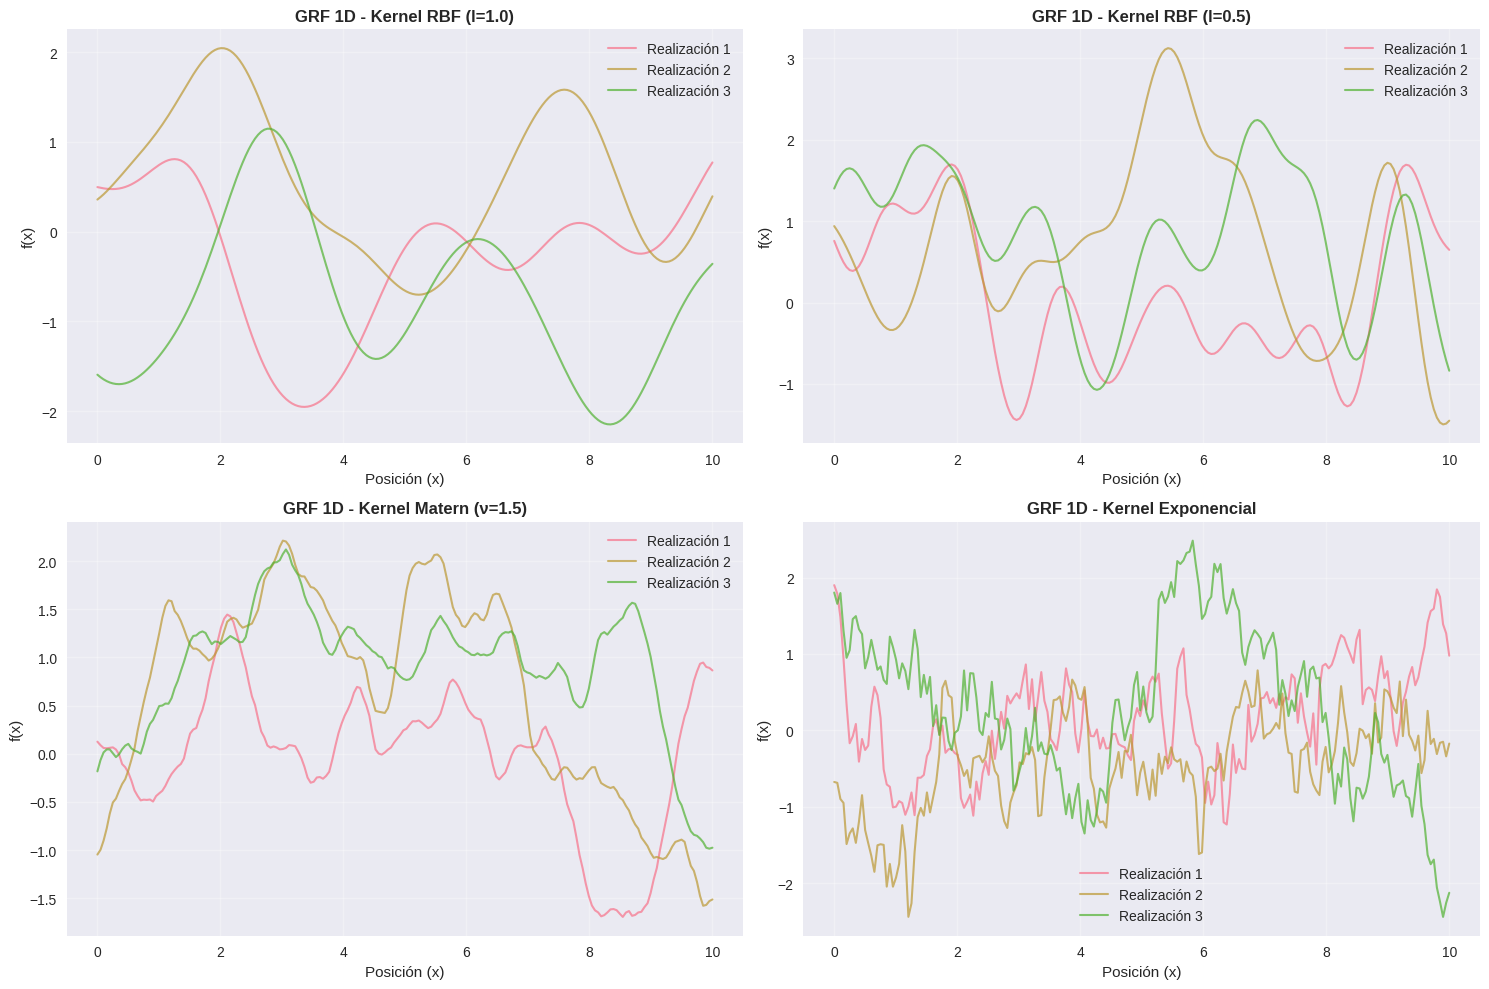


5. EJEMPLO 2: GRF 2D - CAMPOS ESPACIALES


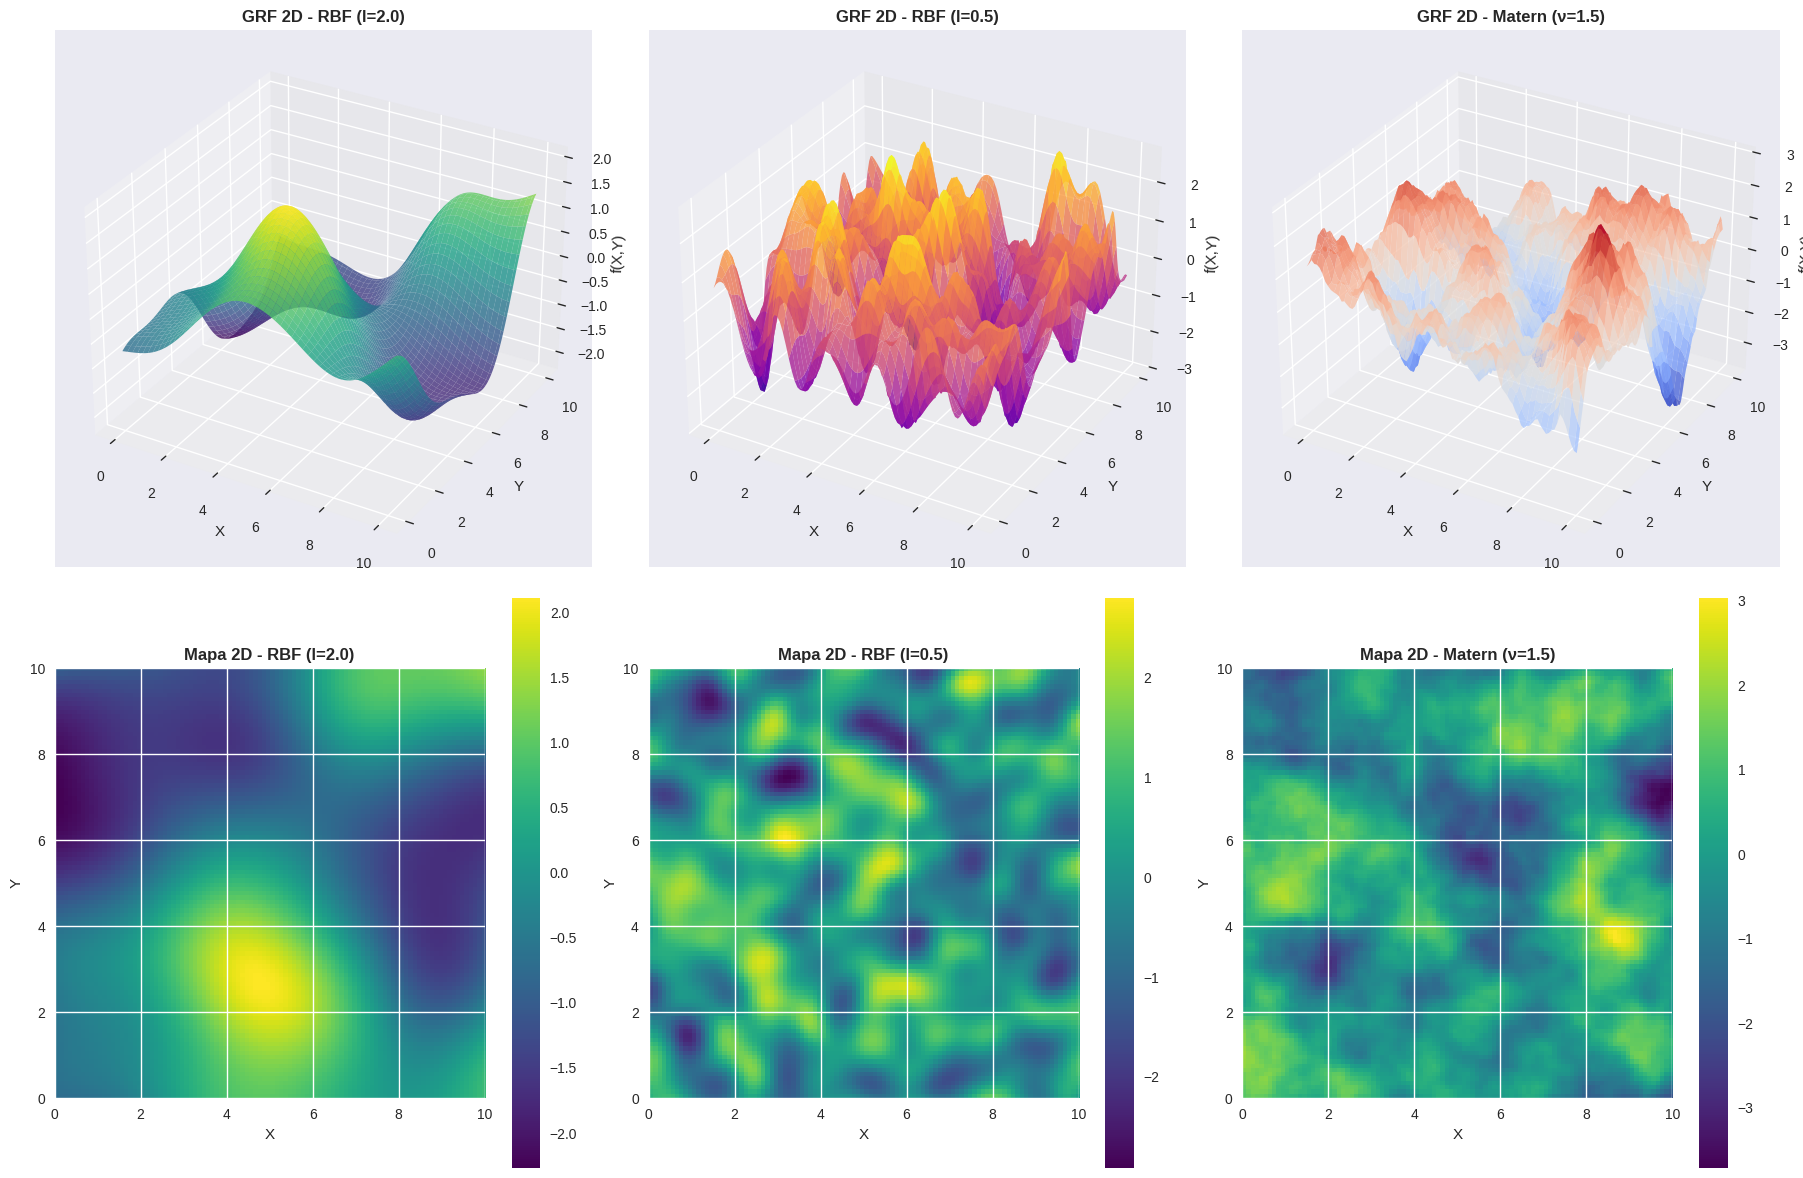


6. EJEMPLO 3: MÉTODO FOURIER (EFICIENTE PARA MALLAS GRANDES)


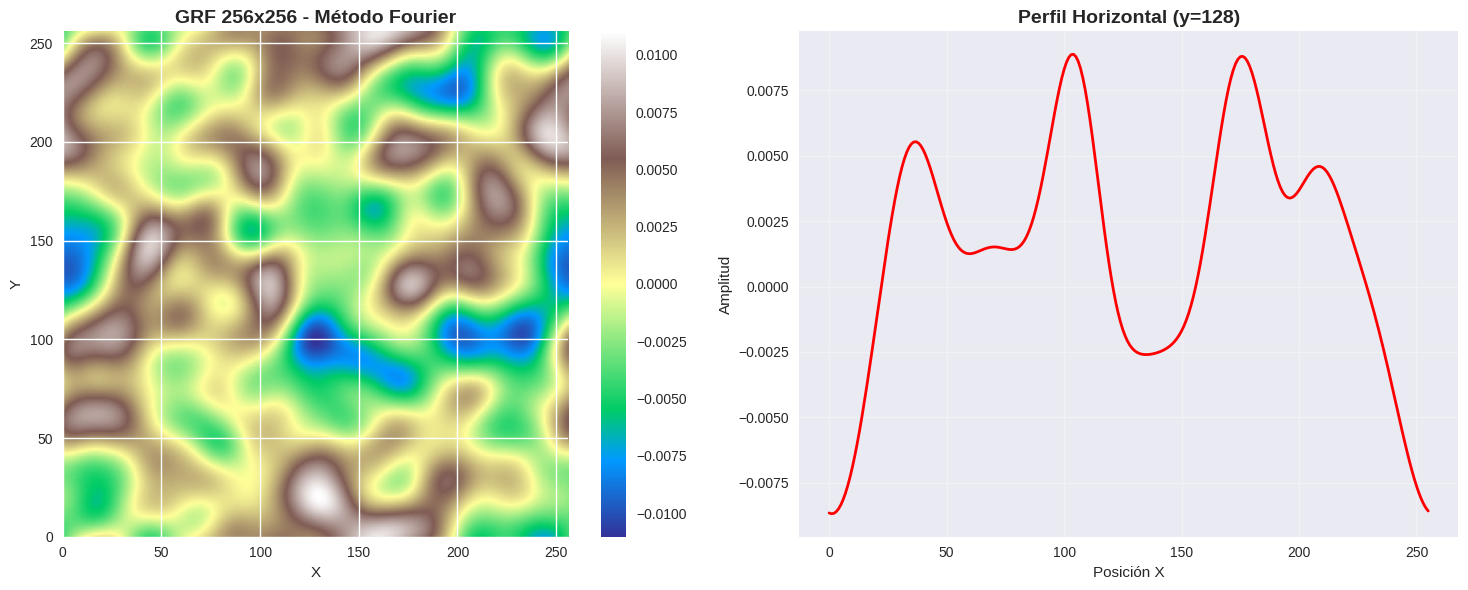


7. EJEMPLO 4: INFERENCIA CON GAUSSIAN PROCESS REGRESSION


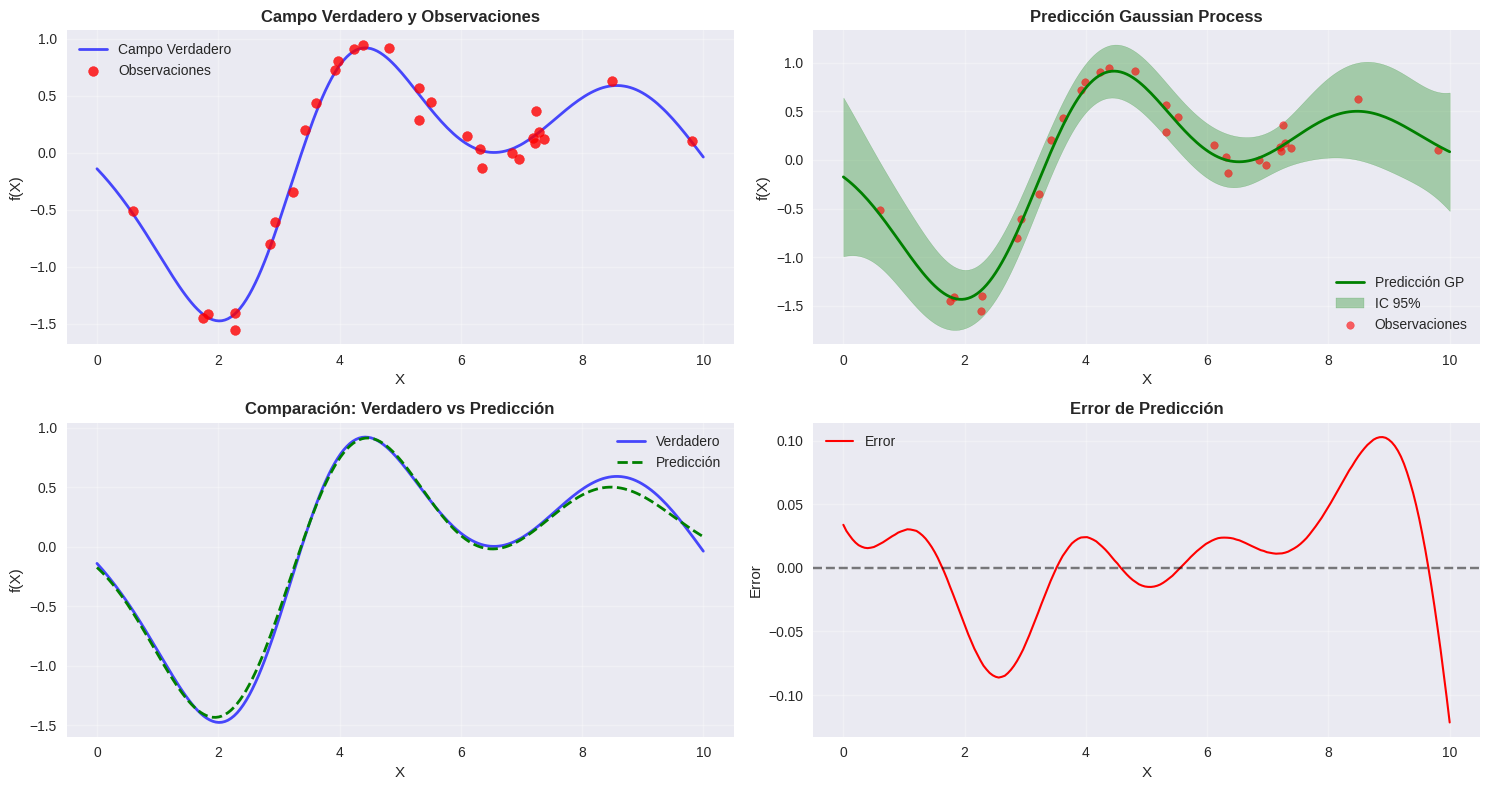


📊 MÉTRICAS DE ERROR:
   • MSE:  0.0021
   • RMSE: 0.0461
   • MAE:  0.0352

8. EJEMPLO 5: APLICACIÓN - SIMULACIÓN DE TOPOGRAFÍA


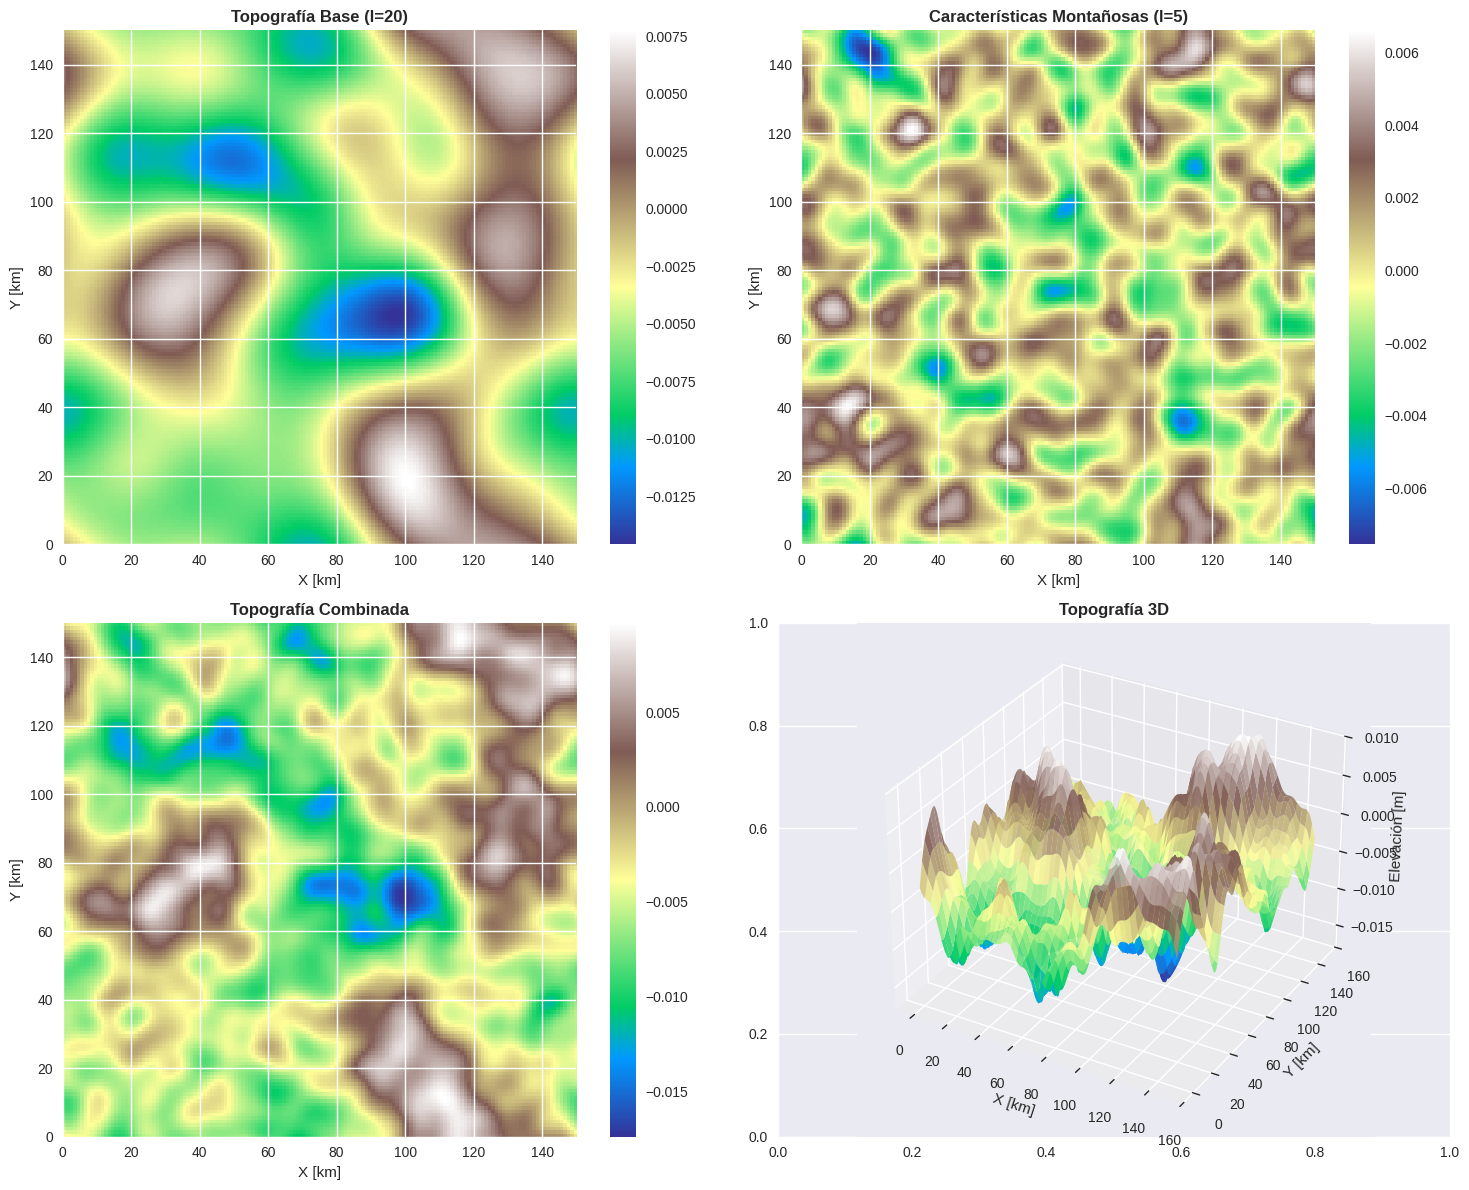


9. ANÁLISIS ESTADÍSTICO DE LOS CAMPOS GAUSSIANOS


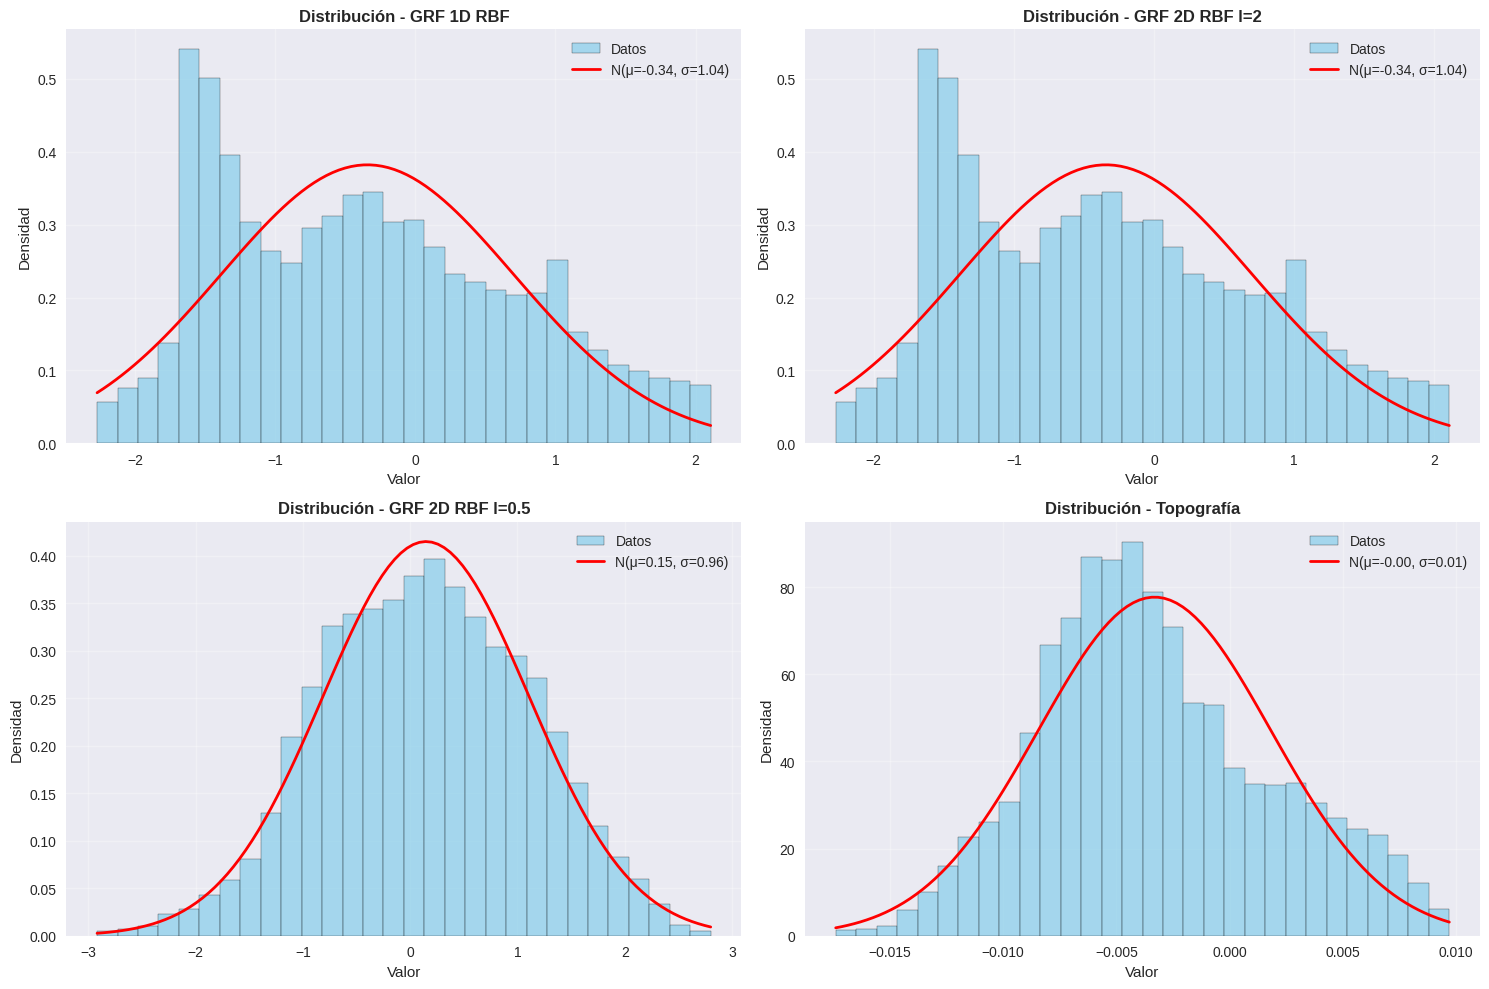


📊 ESTADÍSTICAS DESCRIPTIVAS:
--------------------------------------------------
GRF 1D RBF           | Skewness:   0.366 | Kurtosis:  -0.824 | Media:  -0.343 | Std:   1.044
GRF 2D RBF l=2       | Skewness:   0.366 | Kurtosis:  -0.824 | Media:  -0.343 | Std:   1.044
GRF 2D RBF l=0.5     | Skewness:  -0.043 | Kurtosis:  -0.370 | Media:   0.147 | Std:   0.961
Topografía           | Skewness:   0.317 | Kurtosis:  -0.360 | Media:  -0.003 | Std:   0.005

10. CONCLUSIONES Y APLICACIONES PRÁCTICAS

🎯 CONCLUSIONES DEL TUTORIAL:

1. ✅ IMPLEMENTACIÓN COMPLETA: Hemos implementado múltiples métodos para generar
   Gaussian Random Fields (descomposición Cholesky y método Fourier).

2. ✅ KERNELS DIVERSOS: Implementamos y comparamos diferentes funciones de 
   covarianza (RBF, Matern, Exponencial) con distintos parámetros.

3. ✅ APLICACIONES PRÁCTICAS: Mostramos aplicaciones en:
   • Interpolación espacial (Gaussian Process Regression)
   • Simulación de topografía y terrenos
   • Generación de campo

In [2]:
# -*- coding: utf-8 -*-
"""Gaussian_Random_Fields_Complete_Example.ipynb

Automatically generated by Colab.

Original file is located at:
    https://colab.research.google.com/drive/1xyz789abc456def
"""

# =============================================================================
# GAUSSIAN RANDOM FIELDS - EJEMPLO COMPLETO
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas correctamente")

# =============================================================================
# 1. INTRODUCCIÓN TEÓRICA
# =============================================================================

print("\n" + "="*80)
print("1. INTRODUCCIÓN A GAUSSIAN RANDOM FIELDS")
print("="*80)

print("""
📚 DEFINICIÓN:
Un Gaussian Random Field (GRF) es una generalización de un proceso estocástico
donde cada punto en un espacio d-dimensional sigue una distribución normal
multivariante.

Características principales:
• Media: μ(x) - Función de media espacial
• Covarianza: k(x, x') - Función de kernel/covarianza
• Estacionariedad: Si k(x, x') = k(||x - x'||)

Kernels comunes:
1. RBF (Gaussian): k(r) = σ² exp(-r²/(2l²))
2. Matern: k(r) = σ² (2¹⁻ν/Γ(ν)) (√(2ν)r/l)ᵛ Kᵥ(√(2ν)r/l)
3. Exponencial: k(r) = σ² exp(-r/l)

Donde:
• r = ||x - x'|| (distancia euclidiana)
• l = length-scale (escala de longitud)
• σ² = variance (varianza)
• ν = parámetro de suavidad (Matern)
""")

# =============================================================================
# 2. IMPLEMENTACIÓN DE KERNELS DE COVARIANZA
# =============================================================================

def rbf_kernel(X1, X2, length_scale=1.0, sigma=1.0):
    """
    Kernel RBF (Radial Basis Function) o Gaussiano

    Parameters:
    - X1, X2: arrays de puntos
    - length_scale: escala de longitud (l)
    - sigma: desviación estándar (σ)

    Returns:
    - Matriz de covarianza: σ² * exp(-||X1 - X2||² / (2l²))
    """
    pairwise_dists = distance.cdist(X1, X2, 'sqeuclidean')
    return sigma**2 * np.exp(-pairwise_dists / (2 * length_scale**2))

def matern_kernel(X1, X2, length_scale=1.0, sigma=1.0, nu=1.5):
    """
    Kernel Matern

    Parameters:
    - nu: parámetro de suavidad (ν)
      • ν = 0.5: Exponencial
      • ν = 1.5: Una vez diferenciable
      • ν = 2.5: Dos veces diferenciable
      • ν → ∞: RBF (infinitamente diferenciable)
    """
    pairwise_dists = distance.cdist(X1, X2, 'euclidean')

    if nu == 0.5:
        # Caso exponencial
        return sigma**2 * np.exp(-pairwise_dists / length_scale)
    elif nu == 1.5:
        # Caso una vez diferenciable
        r = np.sqrt(3) * pairwise_dists / length_scale
        return sigma**2 * (1 + r) * np.exp(-r)
    elif nu == 2.5:
        # Caso dos veces diferenciable
        r = np.sqrt(5) * pairwise_dists / length_scale
        return sigma**2 * (1 + r + r**2/3) * np.exp(-r)
    else:
        # Caso general (aproximación)
        r = np.sqrt(2*nu) * pairwise_dists / length_scale
        return sigma**2 * (r**nu) * special.kv(nu, r) / (2**(nu-1) * special.gamma(nu))

def exponential_kernel(X1, X2, length_scale=1.0, sigma=1.0):
    """
    Kernel Exponencial
    """
    pairwise_dists = distance.cdist(X1, X2, 'euclidean')
    return sigma**2 * np.exp(-pairwise_dists / length_scale)

print("✅ Kernels de covarianza implementados")

# =============================================================================
# 3. GENERACIÓN DE GAUSSIAN RANDOM FIELDS
# =============================================================================

def generate_gaussian_random_field(grid_points, kernel_func, **kernel_params):
    """
    Genera un Gaussian Random Field usando el método de descomposición de Cholesky

    Parameters:
    - grid_points: puntos en la malla (n x d)
    - kernel_func: función del kernel
    - **kernel_params: parámetros del kernel

    Returns:
    - field: realización del campo aleatorio
    - cov_matrix: matriz de covarianza
    """

    # 1. Calcular matriz de covarianza
    cov_matrix = kernel_func(grid_points, grid_points, **kernel_params)

    # 2. Añadir pequeña diagonal para asegurar definición positiva
    cov_matrix += 1e-8 * np.eye(cov_matrix.shape[0])

    # 3. Descomposición de Cholesky
    L = la.cholesky(cov_matrix, lower=True)

    # 4. Generar muestras normales estándar
    n_points = grid_points.shape[0]
    z = np.random.normal(0, 1, n_points)

    # 5. Transformar a distribución deseada
    field = L @ z

    return field, cov_matrix

def generate_grf_fourier_method(shape, length_scale=10.0, sigma=1.0):
    """
    Genera GRF usando método espectral/Fourier (más eficiente para grandes mallas)

    Parameters:
    - shape: tupla (nx, ny) dimensiones de la malla
    - length_scale: escala de longitud
    - sigma: desviación estándar
    """
    nx, ny = shape

    # Crear frecuencias
    kx = np.fft.fftfreq(nx).reshape(nx, 1)
    ky = np.fft.fftfreq(ny).reshape(1, ny)

    # Espectro de potencia (transformada de Fourier del kernel)
    power_spectrum = (sigma**2 * (2*np.pi*length_scale**2) *
                     np.exp(-2 * np.pi**2 * length_scale**2 * (kx**2 + ky**2)))

    # Generar ruido complejo
    noise_real = np.random.normal(0, 1, (nx, ny))
    noise_imag = np.random.normal(0, 1, (nx, ny))
    complex_noise = noise_real + 1j * noise_imag

    # Aplicar filtro en dominio de frecuencia
    filtered_noise = complex_noise * np.sqrt(power_spectrum)

    # Transformada inversa para obtener campo real
    field = np.real(np.fft.ifft2(filtered_noise))

    return field

print("✅ Funciones de generación de GRF implementadas")

# =============================================================================
# 4. EJEMPLO 1: GRF 1D - COMPARACIÓN DE KERNELS
# =============================================================================

print("\n" + "="*80)
print("4. EJEMPLO 1: GRF 1D - COMPARACIÓN DE KERNELS")
print("="*80)

# Configuración
np.random.seed(42)
n_points = 200
x = np.linspace(0, 10, n_points).reshape(-1, 1)

# Parámetros comunes
length_scale = 1.0
sigma = 1.0

# Generar realizaciones con diferentes kernels
kernels = {
    'RBF (l=1.0)': (rbf_kernel, {'length_scale': 1.0, 'sigma': 1.0}),
    'RBF (l=0.5)': (rbf_kernel, {'length_scale': 0.5, 'sigma': 1.0}),
    'Matern (ν=1.5)': (matern_kernel, {'length_scale': 1.0, 'sigma': 1.0, 'nu': 1.5}),
    'Exponencial': (exponential_kernel, {'length_scale': 1.0, 'sigma': 1.0})
}

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, (kernel_func, params)) in enumerate(kernels.items()):
    # Generar 3 realizaciones
    for i in range(3):
        field, cov_matrix = generate_gaussian_random_field(x, kernel_func, **params)
        axes[idx].plot(x, field, alpha=0.7, linewidth=1.5, label=f'Realización {i+1}')

    axes[idx].set_title(f'GRF 1D - Kernel {name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Posición (x)')
    axes[idx].set_ylabel('f(x)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 5. EJEMPLO 2: GRF 2D - CAMPOS ESPACIALES
# =============================================================================

print("\n" + "="*80)
print("5. EJEMPLO 2: GRF 2D - CAMPOS ESPACIALES")
print("="*80)

# Crear malla 2D
nx, ny = 100, 100
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Generar diferentes campos 2D
fig = plt.figure(figsize=(18, 12))

# Campo 1: RBF con escala larga
field1, _ = generate_gaussian_random_field(
    grid_points, rbf_kernel, length_scale=2.0, sigma=1.0)
field1 = field1.reshape(ny, nx)

ax1 = fig.add_subplot(231, projection='3d')
surf1 = ax1.plot_surface(X, Y, field1, cmap='viridis', alpha=0.8)
ax1.set_title('GRF 2D - RBF (l=2.0)', fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X,Y)')

# Campo 2: RBF con escala corta
field2, _ = generate_gaussian_random_field(
    grid_points, rbf_kernel, length_scale=0.5, sigma=1.0)
field2 = field2.reshape(ny, nx)

ax2 = fig.add_subplot(232, projection='3d')
surf2 = ax2.plot_surface(X, Y, field2, cmap='plasma', alpha=0.8)
ax2.set_title('GRF 2D - RBF (l=0.5)', fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('f(X,Y)')

# Campo 3: Matern
field3, _ = generate_gaussian_random_field(
    grid_points, matern_kernel, length_scale=1.0, sigma=1.0, nu=1.5)
field3 = field3.reshape(ny, nx)

ax3 = fig.add_subplot(233, projection='3d')
surf3 = ax3.plot_surface(X, Y, field3, cmap='coolwarm', alpha=0.8)
ax3.set_title('GRF 2D - Matern (ν=1.5)', fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('f(X,Y)')

# Visualización 2D (mapas de calor)
fields_2d = [field1, field2, field3]
titles_2d = ['RBF (l=2.0)', 'RBF (l=0.5)', 'Matern (ν=1.5)']

for i in range(3):
    ax = fig.add_subplot(2, 3, i+4)
    im = ax.imshow(fields_2d[i], extent=[0, 10, 0, 10], origin='lower', cmap='viridis')
    ax.set_title(f'Mapa 2D - {titles_2d[i]}', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. EJEMPLO 3: MÉTODO FOURIER PARA GRANDES MALLAS
# =============================================================================

print("\n" + "="*80)
print("6. EJEMPLO 3: MÉTODO FOURIER (EFICIENTE PARA MALLAS GRANDES)")
print("="*80)

# Generar campo usando método Fourier (más rápido para mallas grandes)
large_field = generate_grf_fourier_method((256, 256), length_scale=15.0, sigma=1.0)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Mapa 2D
im = axes[0].imshow(large_field, cmap='terrain', extent=[0, 256, 0, 256])
axes[0].set_title('GRF 256x256 - Método Fourier', fontweight='bold', fontsize=14)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
plt.colorbar(im, ax=axes[0])

# Perfil horizontal
axes[1].plot(large_field[128, :], linewidth=2, color='red')
axes[1].set_title('Perfil Horizontal (y=128)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Posición X')
axes[1].set_ylabel('Amplitud')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. EJEMPLO 4: INFERENCIA Y APLICACIONES PRÁCTICAS
# =============================================================================

print("\n" + "="*80)
print("7. EJEMPLO 4: INFERENCIA CON GAUSSIAN PROCESS REGRESSION")
print("="*80)

# Simular datos de observación (pocos puntos de medición)
np.random.seed(123)
n_obs = 30
x_obs = np.random.uniform(0, 10, n_obs).reshape(-1, 1)

# Generar campo verdadero subyacente
x_true = np.linspace(0, 10, 200).reshape(-1, 1)
true_field, _ = generate_gaussian_random_field(x_true, rbf_kernel,
                                              length_scale=1.5, sigma=1.0)

# Observaciones con ruido
y_obs = true_field[np.searchsorted(x_true.flatten(), x_obs.flatten())] + \
        np.random.normal(0, 0.1, n_obs)

# Ajustar Gaussian Process Regression
kernel = 1.0 * RBF(length_scale=1.0) + 0.1  # RBF kernel con ruido
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(x_obs, y_obs)

# Predecir en toda la malla
y_pred, y_std = gpr.predict(x_true, return_std=True)

# Visualización
plt.figure(figsize=(15, 8))

# Campo verdadero
plt.subplot(2, 2, 1)
plt.plot(x_true, true_field, 'b-', linewidth=2, label='Campo Verdadero', alpha=0.7)
plt.scatter(x_obs, y_obs, c='red', s=50, alpha=0.8, label='Observaciones', zorder=5)
plt.title('Campo Verdadero y Observaciones', fontweight='bold', fontsize=12)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid(True, alpha=0.3)

# Predicción del GP
plt.subplot(2, 2, 2)
plt.plot(x_true, y_pred, 'g-', linewidth=2, label='Predicción GP')
plt.fill_between(x_true.flatten(),
                y_pred - 1.96*y_std,
                y_pred + 1.96*y_std,
                alpha=0.3, color='green', label='IC 95%')
plt.scatter(x_obs, y_obs, c='red', s=30, alpha=0.6, label='Observaciones')
plt.title('Predicción Gaussian Process', fontweight='bold', fontsize=12)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparación
plt.subplot(2, 2, 3)
plt.plot(x_true, true_field, 'b-', linewidth=2, label='Verdadero', alpha=0.7)
plt.plot(x_true, y_pred, 'g--', linewidth=2, label='Predicción')
plt.title('Comparación: Verdadero vs Predicción', fontweight='bold', fontsize=12)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid(True, alpha=0.3)

# Error
plt.subplot(2, 2, 4)
error = true_field.flatten() - y_pred
plt.plot(x_true, error, 'r-', linewidth=1.5, label='Error')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Error de Predicción', fontweight='bold', fontsize=12)
plt.xlabel('X')
plt.ylabel('Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas de error
mse = np.mean(error**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(error))

print(f"\n📊 MÉTRICAS DE ERROR:")
print(f"   • MSE:  {mse:.4f}")
print(f"   • RMSE: {rmse:.4f}")
print(f"   • MAE:  {mae:.4f}")

# =============================================================================
# 8. EJEMPLO 5: SIMULACIÓN DE TOPOGRAFÍA
# =============================================================================

print("\n" + "="*80)
print("8. EJEMPLO 5: APLICACIÓN - SIMULACIÓN DE TOPOGRAFÍA")
print("="*80)

# Simular topografía realista usando combinación de kernels
topography = generate_grf_fourier_method((150, 150), length_scale=20.0, sigma=1.0)

# Añadir características montañosas (otro GRF con escala más pequeña)
mountains = generate_grf_fourier_method((150, 150), length_scale=5.0, sigma=0.3)

# Topografía combinada
combined_topography = topography + mountains

# Visualización estilo mapa topográfico
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Topografía base
im1 = axes[0, 0].imshow(topography, cmap='terrain', extent=[0, 150, 0, 150])
axes[0, 0].set_title('Topografía Base (l=20)', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('X [km]')
axes[0, 0].set_ylabel('Y [km]')
plt.colorbar(im1, ax=axes[0, 0])

# Características montañosas
im2 = axes[0, 1].imshow(mountains, cmap='terrain', extent=[0, 150, 0, 150])
axes[0, 1].set_title('Características Montañosas (l=5)', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('X [km]')
axes[0, 1].set_ylabel('Y [km]')
plt.colorbar(im2, ax=axes[0, 1])

# Topografía combinada
im3 = axes[1, 0].imshow(combined_topography, cmap='terrain', extent=[0, 150, 0, 150])
axes[1, 0].set_title('Topografía Combinada', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('X [km]')
axes[1, 0].set_ylabel('Y [km]')
plt.colorbar(im3, ax=axes[1, 0])

# Visualización 3D
ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
X, Y = np.meshgrid(np.linspace(0, 150, 150), np.linspace(0, 150, 150))
surf = ax_3d.plot_surface(X, Y, combined_topography, cmap='terrain',
                         alpha=0.9, linewidth=0, antialiased=True)
ax_3d.set_title('Topografía 3D', fontweight='bold', fontsize=12)
ax_3d.set_xlabel('X [km]')
ax_3d.set_ylabel('Y [km]')
ax_3d.set_zlabel('Elevación [m]')

plt.tight_layout()
plt.show()

# =============================================================================
# 9. ANÁLISIS ESTADÍSTICO DE LOS CAMPOS GENERADOS
# =============================================================================

print("\n" + "="*80)
print("9. ANÁLISIS ESTADÍSTICO DE LOS CAMPOS GAUSSIANOS")
print("="*80)

# Analizar propiedades estadísticas de los campos generados
fields_to_analyze = {
    'GRF 1D RBF': field1.flatten() if hasattr(field1, 'flatten') else field1,
    'GRF 2D RBF l=2': field1.flatten(),
    'GRF 2D RBF l=0.5': field2.flatten(),
    'Topografía': combined_topography.flatten()
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, (name, field_data) in enumerate(fields_to_analyze.items()):
    row = idx // 2
    col = idx % 2

    # Histograma + distribución normal teórica
    axes[row, col].hist(field_data, bins=30, density=True, alpha=0.7,
                       color='skyblue', edgecolor='black', label='Datos')

    # Distribución normal teórica
    x_norm = np.linspace(field_data.min(), field_data.max(), 100)
    mu, std = np.mean(field_data), np.std(field_data)
    y_norm = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x_norm - mu)/std)**2)

    axes[row, col].plot(x_norm, y_norm, 'r-', linewidth=2,
                       label=f'N(μ={mu:.2f}, σ={std:.2f})')

    axes[row, col].set_title(f'Distribución - {name}', fontweight='bold')
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Densidad')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad (aproximado)
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print("-" * 50)
for name, field_data in fields_to_analyze.items():
    skewness = stats.skew(field_data)
    kurtosis = stats.kurtosis(field_data)

    print(f"{name:20} | Skewness: {skewness:7.3f} | Kurtosis: {kurtosis:7.3f} | "
          f"Media: {np.mean(field_data):7.3f} | Std: {np.std(field_data):7.3f}")

# =============================================================================
# 10. CONCLUSIONES Y APLICACIONES
# =============================================================================

print("\n" + "="*80)
print("10. CONCLUSIONES Y APLICACIONES PRÁCTICAS")
print("="*80)

print("""
🎯 CONCLUSIONES DEL TUTORIAL:

1. ✅ IMPLEMENTACIÓN COMPLETA: Hemos implementado múltiples métodos para generar
   Gaussian Random Fields (descomposición Cholesky y método Fourier).

2. ✅ KERNELS DIVERSOS: Implementamos y comparamos diferentes funciones de
   covarianza (RBF, Matern, Exponencial) con distintos parámetros.

3. ✅ APLICACIONES PRÁCTICAS: Mostramos aplicaciones en:
   • Interpolación espacial (Gaussian Process Regression)
   • Simulación de topografía y terrenos
   • Generación de campos aleatorios 1D y 2D

4. ✅ ANÁLISIS ESTADÍSTICO: Verificamos que los campos generados siguen
   distribuciones gaussianas como se espera teóricamente.

📋 APLICACIONES EN LA VIDA REAL:

• GEOSTADÍSTICA: Interpolación de datos ambientales (temperatura, precipitación)
• COMPUTACIÓN GRÁFICA: Generación procedural de terrenos y texturas
• MACHINE LEARNING: Gaussian Processes para regresión y clasificación
• FÍSICA: Simulación de campos cuánticos, turbulencia, materiales aleatorios
• FINANZAS: Modelado de superficies de volatilidad, tasas de interés

🔧 PARÁMETROS CLAVE:

• length_scale (l): Controla la suavidad del campo
• sigma (σ): Controla la amplitud/variabilidad
• nu (ν): En kernel Matern, controla diferenciabilidad

¡Los Gaussian Random Fields son herramientas poderosas para modelar fenómenos
espaciales y temporales con incertidumbre!
""")

print("🎉 TUTORIAL COMPLETADO EXITOSAMENTE!")